# Train baseline clinical transformer Model for Survival
This is the training of the clinical transformer withoug using pre-trained weights from the self uspervised model.

In [1]:

import os
os.environ["XLA_FLAGS"] = "--xla_gpu_cuda_data_dir=/home/shenwanxiang/anaconda3"

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import tensorflow as tf
tf.test.is_gpu_available()
tf.__version__

tf.config.run_functions_eagerly(True)

import sys
sys.path.append('../../../codeocean/environment/clinical_transformer/')

2025-08-14 15:06:39.970204: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-14 15:06:40.028777: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-14 15:06:40.376889: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shenwanxiang/anaconda3/lib:
2025-08-14 15:06:40.376924: W tensorflow/compiler/xla/stream_exe

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2025-08-14 15:06:40.790102: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-14 15:06:40.802326: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-14 15:06:40.818368: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-14 15:06:40.818455: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at

In [2]:
from xai.models import Trainer
from xai.models import SurvivalTransformer
from xai.models import OptimizedSurvivalDataGenerator as SurvivalDataGenerator
from xai.losses.survival import cIndex_SigmoidApprox as cindex_loss
from xai.metrics.survival import sigmoid_concordance as cindex_metric

In [3]:
import pandas as pd
from samecode.random import set_seed

## Dataset

In [4]:
data = pd.read_csv('./data/dataset-train.data.csv')
features = data.columns[-29:].tolist()

In [5]:
features

['Angiogenesis',
 'Antitumor cytokines',
 'B cells',
 'Cancer-associated fibroblasts',
 'Checkpoint molecules',
 'Co-stimulatory ligands',
 'Co-stimulatory receptors',
 'Effector cell traffic',
 'Effector cells',
 'Endothelium',
 'Granulocyte traffic',
 'Immune Suppression by Myeloid Cells',
 'M1 signature',
 'MHCI',
 'MHCII',
 'Macrophage and DC traffic',
 'Matrix',
 'Matrix remodeling',
 'Myeloid cells traffic',
 'NK cells',
 'Neutrophil signature',
 'Protumor cytokines',
 'T cells',
 'Th1 signature',
 'Th2 signature',
 'Treg',
 'Treg and Th2 traffic',
 'Tumor proliferation rate',
 'Tumor-associated Macrophages']

## Parameters

In [6]:
max_features_percentile=100
test_size=0.1 # fraction of samples used for testing
repetitions=10 # number replicates (training / testing) random splits to evaluate variability.

mode='survival'
learning_rate=0.0001
epochs=300
verbose=1
seed=0
embedding_size = 128
num_heads = 2
num_layers = 8

In [7]:
! rm -r ./results/Survival/

/bin/sh: /home/shenwanxiang/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/sh)


## Training

In [8]:
outdir = './results/Survival/'

set_seed(0)

trainer = Trainer(
    out_dir = outdir,
    max_features_percentile=max_features_percentile,
    test_size=test_size,
    mode=mode,
    model=SurvivalTransformer, 
    dataloader=SurvivalDataGenerator,
    loss=cindex_loss,
    metrics=[cindex_metric]
)

trainer.setup_data(
    data, 
    discrete_features = [],
    continuous_features = features,
    target=['time', 'event']
)

trainer.setup_model(
    learning_rate=learning_rate,
    embedding_size=embedding_size,
    num_heads=num_heads,
    num_layers=num_layers,
    batch_size_max=True,
    save_best_only=False
)

trainer.fit(repetitions=repetitions, epochs=epochs, verbose=verbose, seed=seed)

/home/shenwanxiang/.local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO	2025-08-14 15:06:42,950	Setting up working directory: ./results/Survival/
INFO	2025-08-14 15:06:42,959	Number of continuous features: 29
INFO	2025-08-14 15:06:42,960	Number of discrete features: 0
INFO	2025-08-14 15:06:42,960	Number of samples: 562
INFO	2025-08-14 15:06:42,965	Number of classes: 1
INFO	2025-08-14 15:06:42,965	RUN ID: fold-0_id-0
INFO	2025-08-14 15:06:42,965	RUN ID out directory: ./results/Survival//fold-0_id-0/
INFO	2025-08-14 15:06:43,007	Training samples: 505
INFO	2025-08-14 15:06:43,007	Testing samples: 57
INFO	2025-08-14 15:06:43,008	Number of features at 100th percentile: 29 that are non nans
2025-08-14 15:06:43.009534: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NU

Epoch 1/300
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


WARNING	2025-08-14 15:06:44,120	AutoGraph could not transform <function cIndex_SigmoidApprox at 0x7f688e20c5f0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


WARNING	2025-08-14 15:06:44,333	AutoGraph could not transform <function sigmoid_concordance at 0x7f68f439d7a0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 1s 518ms/step - loss: 0.4844 - sigmoid_concordance: 0.5287 - val_loss: 0.4955 - val_sigmoid_concordance: 0.5907
Epoch 2/300
1/1 [==============================] - 0s 279ms/step - loss: 0.5094 - sigmoid_concordance: 0.4786 - val_loss: 0.4928 - val_sigmoid_concordance: 0.6026
Epoch 3/300
1/1 [==============================] - 0s 277ms/step - loss: 0.4924 - sigmoid_concordance: 0.5157 - val_loss: 0.4913 - val_sigmoid_concordance: 0.5996
Epoch 4/300
1/1 [==============================] - 0s 276ms/step - loss: 0.5067 - sigmoid_concordance: 0.4886 - val_loss: 0.4905 - val_sigmoid_concordance: 0.5937
Epoch 5/300
1/1 [==============================] - 0s 276

INFO	2025-08-14 15:08:12,190	RUN ID: fold-1_id-1
INFO	2025-08-14 15:08:12,190	RUN ID out directory: ./results/Survival//fold-1_id-1/
INFO	2025-08-14 15:08:12,233	Training samples: 505
INFO	2025-08-14 15:08:12,234	Testing samples: 57
INFO	2025-08-14 15:08:12,235	Number of features at 100th percentile: 29 that are non nans


Epoch 1/300


/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1/1 [==============================] - 0s 464ms/step - loss: 0.4780 - sigmoid_concordance: 0.5473 - val_loss: 0.4960 - val_sigmoid_concordance: 0.5532
Epoch 2/300
1/1 [==============================] - 0s 313ms/step - loss: 0.5094 - sigmoid_concordance: 0.4827 - val_loss: 0.4948 - val_sigmoid_concordance: 0.5455
Epoch 3/300
1/1 [==============================] - 0s 288ms/step - loss: 0.5006 - sigmoid_concordance: 0.4956 - val_loss: 0.4926 - val_sigmoid_concordance: 0.5515
Epoch 4/300
1/1 [==============================] - 0s 289ms/step - loss: 0.5045 - sigmoid_concordance: 0.4929 - val_loss: 0.4904 - val_sigmoid_concordance: 0.5609
Epoch 5/300
1/1 [==============================] - 0s 287ms/step - loss: 0.4830 - sigmoid_concordance: 0.5358 - val_loss: 0.4881 - val_sigmoid_concordance: 0.5660
Epoch 6/300
1/1 [==============================] - 0s 294ms/step - loss: 0.4830 - sigmoid_concordance: 0.5320 - val_loss: 0.4855 - val_sigmoid_concordance: 0.5762
Epoch 7/300
1/1 [=================

INFO	2025-08-14 15:09:42,460	RUN ID: fold-2_id-2
INFO	2025-08-14 15:09:42,469	RUN ID out directory: ./results/Survival//fold-2_id-2/
INFO	2025-08-14 15:09:42,511	Training samples: 505
INFO	2025-08-14 15:09:42,511	Testing samples: 57
INFO	2025-08-14 15:09:42,512	Number of features at 100th percentile: 29 that are non nans
/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/300
1/1 [==============================] - 0s 464ms/step - loss: 0.4947 - sigmoid_concordance: 0.5056 - val_loss: 0.4976 - val_sigmoid_concordance: 0.5227
Epoch 2/300
1/1 [==============================] - 0s 292ms/step - loss: 0.5054 - sigmoid_concordance: 0.4928 - val_loss: 0.4968 - val_sigmoid_concordance: 0.5235
Epoch 3/300
1/1 [==============================] - 0s 295ms/step - loss: 0.4856 - sigmoid_concordance: 0.5285 - val_loss: 0.4959 - val_sigmoid_concordance: 0.5293
Epoch 4/300
1/1 [==============================] - 0s 291ms/step - loss: 0.4833 - sigmoid_concordance: 0.5332 - val_loss: 0.4955 - val_sigmoid_concordance: 0.5276
Epoch 5/300
1/1 [==============================] - 0s 294ms/step - loss: 0.4973 - sigmoid_concordance: 0.5072 - val_loss: 0.4943 - val_sigmoid_concordance: 0.5194
Epoch 6/300
1/1 [==============================] - 0s 291ms/step - loss: 0.4953 - sigmoid_concordance: 0.5121 - val_loss: 0.4930 - val_sigmoid_concordance: 0.5185
Epoch 7/300
1/1 [=====

INFO	2025-08-14 15:11:12,812	RUN ID: fold-3_id-3
INFO	2025-08-14 15:11:12,812	RUN ID out directory: ./results/Survival//fold-3_id-3/
INFO	2025-08-14 15:11:12,855	Training samples: 505
INFO	2025-08-14 15:11:12,856	Testing samples: 57
INFO	2025-08-14 15:11:12,857	Number of features at 100th percentile: 29 that are non nans
/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/300
1/1 [==============================] - 1s 557ms/step - loss: 0.4862 - sigmoid_concordance: 0.5278 - val_loss: 0.4867 - val_sigmoid_concordance: 0.6900
Epoch 2/300
1/1 [==============================] - 0s 293ms/step - loss: 0.5036 - sigmoid_concordance: 0.4889 - val_loss: 0.4802 - val_sigmoid_concordance: 0.6917
Epoch 3/300
1/1 [==============================] - 0s 292ms/step - loss: 0.5059 - sigmoid_concordance: 0.4907 - val_loss: 0.4771 - val_sigmoid_concordance: 0.6942
Epoch 4/300
1/1 [==============================] - 0s 298ms/step - loss: 0.5097 - sigmoid_concordance: 0.4827 - val_loss: 0.4733 - val_sigmoid_concordance: 0.6925
Epoch 5/300
1/1 [==============================] - 0s 297ms/step - loss: 0.5059 - sigmoid_concordance: 0.4892 - val_loss: 0.4670 - val_sigmoid_concordance: 0.6976
Epoch 6/300
1/1 [==============================] - 0s 293ms/step - loss: 0.5035 - sigmoid_concordance: 0.4916 - val_loss: 0.4639 - val_sigmoid_concordance: 0.6992
Epoch 7/300
1/1 [=====

INFO	2025-08-14 15:12:43,636	RUN ID: fold-4_id-4
INFO	2025-08-14 15:12:43,644	RUN ID out directory: ./results/Survival//fold-4_id-4/
INFO	2025-08-14 15:12:43,688	Training samples: 505
INFO	2025-08-14 15:12:43,688	Testing samples: 57
INFO	2025-08-14 15:12:43,689	Number of features at 100th percentile: 29 that are non nans
/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/300
1/1 [==============================] - 0s 470ms/step - loss: 0.5083 - sigmoid_concordance: 0.4835 - val_loss: 0.4983 - val_sigmoid_concordance: 0.5411
Epoch 2/300
1/1 [==============================] - 0s 295ms/step - loss: 0.5014 - sigmoid_concordance: 0.4979 - val_loss: 0.4982 - val_sigmoid_concordance: 0.5597
Epoch 3/300
1/1 [==============================] - 0s 294ms/step - loss: 0.4939 - sigmoid_concordance: 0.5137 - val_loss: 0.4998 - val_sigmoid_concordance: 0.5190
Epoch 4/300
1/1 [==============================] - 0s 293ms/step - loss: 0.4714 - sigmoid_concordance: 0.5598 - val_loss: 0.4973 - val_sigmoid_concordance: 0.5782
Epoch 5/300
1/1 [==============================] - 0s 291ms/step - loss: 0.4749 - sigmoid_concordance: 0.5508 - val_loss: 0.4935 - val_sigmoid_concordance: 0.5915
Epoch 6/300
1/1 [==============================] - 0s 293ms/step - loss: 0.4951 - sigmoid_concordance: 0.5111 - val_loss: 0.4900 - val_sigmoid_concordance: 0.6004
Epoch 7/300
1/1 [=====

INFO	2025-08-14 15:14:14,126	RUN ID: fold-5_id-5
INFO	2025-08-14 15:14:14,135	RUN ID out directory: ./results/Survival//fold-5_id-5/
INFO	2025-08-14 15:14:14,178	Training samples: 505
INFO	2025-08-14 15:14:14,178	Testing samples: 57
INFO	2025-08-14 15:14:14,179	Number of features at 100th percentile: 29 that are non nans
/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/300
1/1 [==============================] - 0s 461ms/step - loss: 0.5054 - sigmoid_concordance: 0.4845 - val_loss: 0.5035 - val_sigmoid_concordance: 0.3661
Epoch 2/300
1/1 [==============================] - 0s 291ms/step - loss: 0.5093 - sigmoid_concordance: 0.4848 - val_loss: 0.5014 - val_sigmoid_concordance: 0.4716
Epoch 3/300
1/1 [==============================] - 0s 291ms/step - loss: 0.5080 - sigmoid_concordance: 0.4845 - val_loss: 0.4987 - val_sigmoid_concordance: 0.4917
Epoch 4/300
1/1 [==============================] - 0s 292ms/step - loss: 0.4814 - sigmoid_concordance: 0.5392 - val_loss: 0.4972 - val_sigmoid_concordance: 0.4844
Epoch 5/300
1/1 [==============================] - 0s 293ms/step - loss: 0.4942 - sigmoid_concordance: 0.5176 - val_loss: 0.4958 - val_sigmoid_concordance: 0.4844
Epoch 6/300
1/1 [==============================] - 0s 291ms/step - loss: 0.4794 - sigmoid_concordance: 0.5421 - val_loss: 0.4942 - val_sigmoid_concordance: 0.4872
Epoch 7/300
1/1 [=====

INFO	2025-08-14 15:15:44,753	RUN ID: fold-6_id-6
INFO	2025-08-14 15:15:44,753	RUN ID out directory: ./results/Survival//fold-6_id-6/
INFO	2025-08-14 15:15:44,798	Training samples: 505
INFO	2025-08-14 15:15:44,798	Testing samples: 57
INFO	2025-08-14 15:15:44,799	Number of features at 100th percentile: 29 that are non nans
/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/300
1/1 [==============================] - 0s 468ms/step - loss: 0.5046 - sigmoid_concordance: 0.4908 - val_loss: 0.4928 - val_sigmoid_concordance: 0.6223
Epoch 2/300
1/1 [==============================] - 0s 296ms/step - loss: 0.4823 - sigmoid_concordance: 0.5375 - val_loss: 0.4876 - val_sigmoid_concordance: 0.6188
Epoch 3/300
1/1 [==============================] - 0s 302ms/step - loss: 0.4909 - sigmoid_concordance: 0.5229 - val_loss: 0.4822 - val_sigmoid_concordance: 0.6223
Epoch 4/300
1/1 [==============================] - 0s 291ms/step - loss: 0.4975 - sigmoid_concordance: 0.5022 - val_loss: 0.4792 - val_sigmoid_concordance: 0.6179
Epoch 5/300
1/1 [==============================] - 0s 292ms/step - loss: 0.4915 - sigmoid_concordance: 0.5182 - val_loss: 0.4760 - val_sigmoid_concordance: 0.6188
Epoch 6/300
1/1 [==============================] - 0s 299ms/step - loss: 0.4967 - sigmoid_concordance: 0.5080 - val_loss: 0.4703 - val_sigmoid_concordance: 0.6161
Epoch 7/300
1/1 [=====

INFO	2025-08-14 15:17:15,662	RUN ID: fold-7_id-7
INFO	2025-08-14 15:17:15,671	RUN ID out directory: ./results/Survival//fold-7_id-7/
INFO	2025-08-14 15:17:15,715	Training samples: 505
INFO	2025-08-14 15:17:15,715	Testing samples: 57
INFO	2025-08-14 15:17:15,716	Number of features at 100th percentile: 29 that are non nans
/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/300
1/1 [==============================] - 0s 468ms/step - loss: 0.5056 - sigmoid_concordance: 0.4840 - val_loss: 0.4999 - val_sigmoid_concordance: 0.4930
Epoch 2/300
1/1 [==============================] - 0s 298ms/step - loss: 0.5010 - sigmoid_concordance: 0.5004 - val_loss: 0.4999 - val_sigmoid_concordance: 0.4930
Epoch 3/300
1/1 [==============================] - 0s 299ms/step - loss: 0.5102 - sigmoid_concordance: 0.4784 - val_loss: 0.5006 - val_sigmoid_concordance: 0.4818
Epoch 4/300
1/1 [==============================] - 0s 302ms/step - loss: 0.4881 - sigmoid_concordance: 0.5202 - val_loss: 0.5008 - val_sigmoid_concordance: 0.4837
Epoch 5/300
1/1 [==============================] - 0s 292ms/step - loss: 0.4981 - sigmoid_concordance: 0.5021 - val_loss: 0.5012 - val_sigmoid_concordance: 0.4846
Epoch 6/300
1/1 [==============================] - 0s 292ms/step - loss: 0.4943 - sigmoid_concordance: 0.5059 - val_loss: 0.5009 - val_sigmoid_concordance: 0.4855
Epoch 7/300
1/1 [=====

INFO	2025-08-14 15:18:46,254	RUN ID: fold-8_id-8
INFO	2025-08-14 15:18:46,262	RUN ID out directory: ./results/Survival//fold-8_id-8/
INFO	2025-08-14 15:18:46,304	Training samples: 505
INFO	2025-08-14 15:18:46,305	Testing samples: 57
INFO	2025-08-14 15:18:46,306	Number of features at 100th percentile: 29 that are non nans


Epoch 1/300


/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1/1 [==============================] - 0s 471ms/step - loss: 0.5133 - sigmoid_concordance: 0.4730 - val_loss: 0.4971 - val_sigmoid_concordance: 0.5412
Epoch 2/300
1/1 [==============================] - 0s 294ms/step - loss: 0.5216 - sigmoid_concordance: 0.4594 - val_loss: 0.4955 - val_sigmoid_concordance: 0.5439
Epoch 3/300
1/1 [==============================] - 0s 293ms/step - loss: 0.4855 - sigmoid_concordance: 0.5352 - val_loss: 0.4940 - val_sigmoid_concordance: 0.5511
Epoch 4/300
1/1 [==============================] - 0s 295ms/step - loss: 0.4958 - sigmoid_concordance: 0.5064 - val_loss: 0.4931 - val_sigmoid_concordance: 0.5557
Epoch 5/300
1/1 [==============================] - 0s 297ms/step - loss: 0.4970 - sigmoid_concordance: 0.5048 - val_loss: 0.4913 - val_sigmoid_concordance: 0.5566
Epoch 6/300
1/1 [==============================] - 0s 295ms/step - loss: 0.4923 - sigmoid_concordance: 0.5157 - val_loss: 0.4894 - val_sigmoid_concordance: 0.5566
Epoch 7/300
1/1 [=================

INFO	2025-08-14 15:20:17,179	RUN ID: fold-9_id-9
INFO	2025-08-14 15:20:17,180	RUN ID out directory: ./results/Survival//fold-9_id-9/
INFO	2025-08-14 15:20:17,223	Training samples: 505
INFO	2025-08-14 15:20:17,223	Testing samples: 57
INFO	2025-08-14 15:20:17,225	Number of features at 100th percentile: 29 that are non nans
/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/300
1/1 [==============================] - 0s 466ms/step - loss: 0.5077 - sigmoid_concordance: 0.4888 - val_loss: 0.4944 - val_sigmoid_concordance: 0.6129
Epoch 2/300
1/1 [==============================] - 0s 293ms/step - loss: 0.4983 - sigmoid_concordance: 0.5019 - val_loss: 0.4888 - val_sigmoid_concordance: 0.6138
Epoch 3/300
1/1 [==============================] - 0s 295ms/step - loss: 0.4899 - sigmoid_concordance: 0.5184 - val_loss: 0.4853 - val_sigmoid_concordance: 0.6075
Epoch 4/300
1/1 [==============================] - 0s 304ms/step - loss: 0.4895 - sigmoid_concordance: 0.5163 - val_loss: 0.4838 - val_sigmoid_concordance: 0.6075
Epoch 5/300
1/1 [==============================] - 0s 308ms/step - loss: 0.4845 - sigmoid_concordance: 0.5286 - val_loss: 0.4830 - val_sigmoid_concordance: 0.6022
Epoch 6/300
1/1 [==============================] - 0s 290ms/step - loss: 0.4930 - sigmoid_concordance: 0.5096 - val_loss: 0.4809 - val_sigmoid_concordance: 0.5977
Epoch 7/300
1/1 [=====

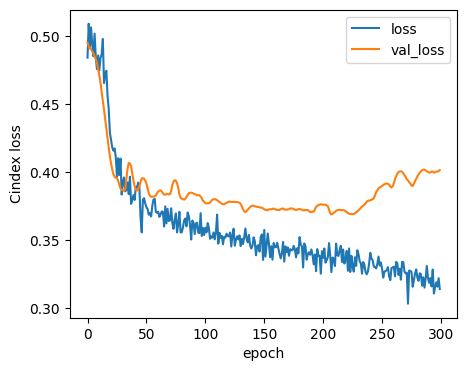

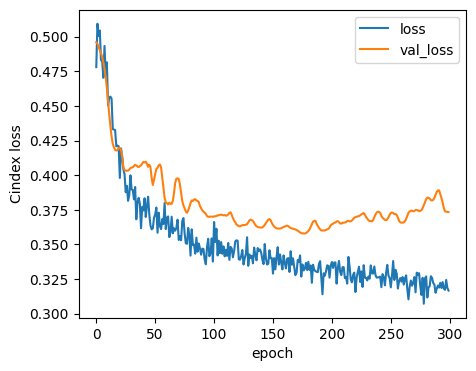

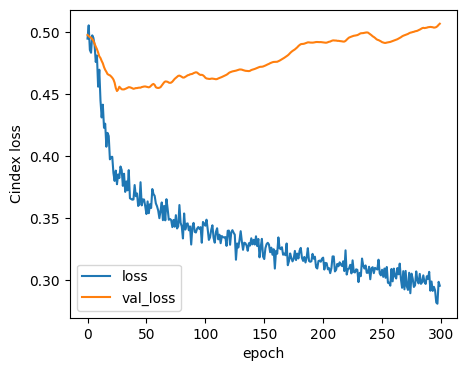

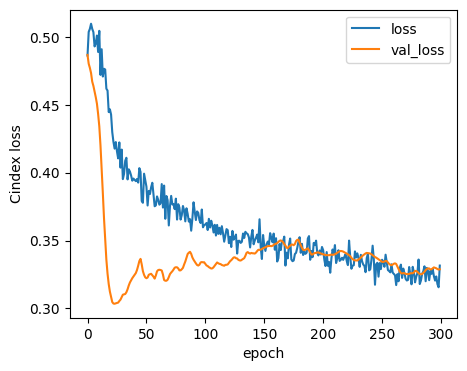

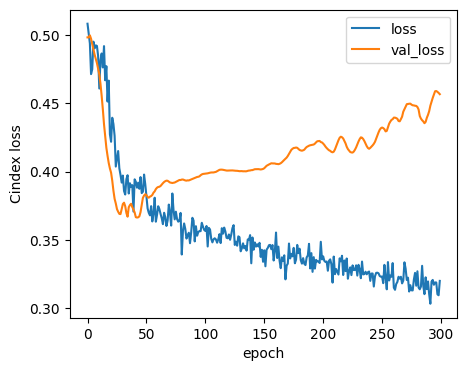

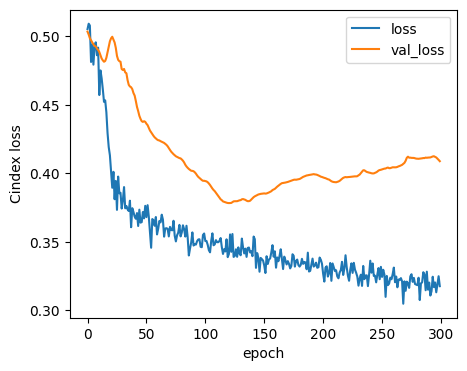

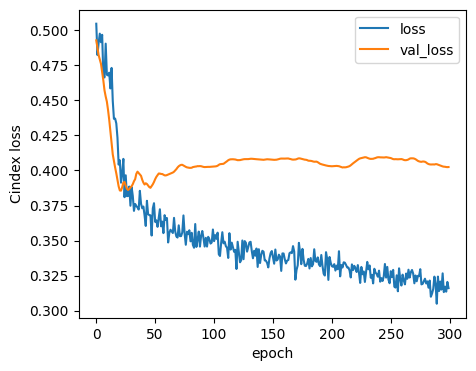

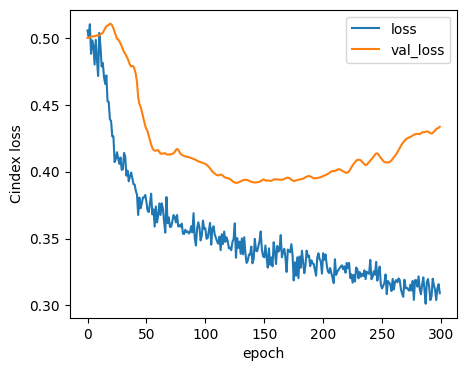

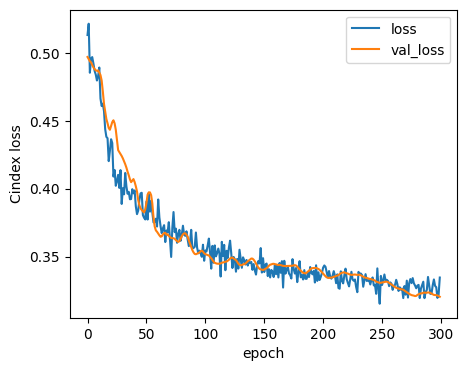

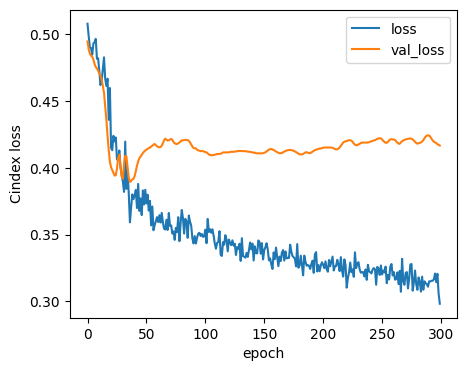

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
best_es = []
for i in range(repetitions):
    dfh = pd.read_csv("./results/Survival/fold-%s_id-%s/history.csv" % (i,i), index_col=0)
    fig, ax=plt.subplots(figsize=(5,4))
    dfh[['loss', 'val_loss']].plot(ax=ax)
    ax.set_ylabel('Cindex loss')
    
    best_e1 = dfh.val_loss.idxmin()
    best_e2 = dfh.val_sigmoid_concordance.idxmax()
    best_es.append(best_e1)
    #best_es.append(best_e2)
    
best_epoch = pd.DataFrame(best_es)[0].median()

In [14]:
pd.DataFrame(best_es).median()

0    81.0
dtype: float64

In [15]:
pd.DataFrame(best_es)

,0
0,207
1,177
2,25
3,23
4,42
5,120
6,21
7,126
8,299
9,36
